<div><font face="Times New Roman" size=7><br><br>
<center>
Linear Regression and Regularization
<center><br></div>


### Machine Learning for Bioinformatics: Homework 1 (Practical)
*Refer to (preferably)Quera or Amir Soleimanifar for any questions you have or other inconveniences*  
*Telegram ID: @amirsoleix*  
*Email: asoleix@gmail.com*

## Overview
<font face="Arial" size=4><br>
We want to train a model which estimates obesity levels based on eating habits and physical conditions of an individual. For our purpose, we will use a dataset of individuals from the countries of Mexico, Peru and Columbia.  
The dataset was collected by Fabio Mendoza Palechor and ALexis de la Hoz Manotas.

## Description
<font face="Arial" size=4><br>
This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. The data contains 17 attributes and 2111 records, the records are labeled with the class variable NObesity (Obesity Level), that allows classification of the data using the values of Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III. 77% of the data was generated synthetically using the Weka tool and the SMOTE filter, 23% of the data was collected directly from users through a web platform.

## Practical Phase
<font face="Arial" size=4><br>
You need to complete each section by writing the relevant code, running and assessing the results. Feel free to add new code or markdown cells. After all snippets have been completed, save the results and upload the Jupyter notebook.

In [ ]:
# Import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [ ]:
# Read the dataset
df = pd.read_csv('./dataset_bmi.csv')
print(df.shape)
df.head()

(2111, 17)


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,18.9
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,22.7
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,21.6
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,28.0
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,26.6


## Split the Data  
<font face="Arial" size=4><br>
Split the data to training (80 percent) and test (20 percent) sets using Stratified Sampling on `BMI` column.

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('BMI', axis=1)
#X = df[['Gender', "Age", 'Height',	'Weight',	'family_history_with_overweight',	'FAVC',	'FCVC',	'NCP',	'CAEC',	'SMOKE',	'CH2O',	'SCC',	'FAF',	'TUE',	'CALC',	'MTRANS']]
y = df['BMI']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42) #stratify=df['BMI']

## Exploratory Data Analysis  
<font face="Arial" size=4><br>
Analyze the data and find information about different attributes. Requested items are:
1. Number of categories and distribution of them in either plots or numbers
2. Mean, std, and quartiles of numerical attributes
3. Check for existence of NaN or empty rows  

Visualize the dataset in convenient way and measure the correlation between different columns of the matrix using `corr()` command.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [ ]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,BMI
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866,29.902132
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927,8.460415
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000,12.800000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000,24.550000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350,29.300000
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000,36.600000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000,48.500000


In [ ]:
# Number of categories

for col in df.columns:
    categories = len(df[col].unique())
    print(f'{col}: {categories} categories')

Gender: 2 categories
Age: 1402 categories
Height: 1574 categories
Weight: 1525 categories
family_history_with_overweight: 2 categories
FAVC: 2 categories
FCVC: 810 categories
NCP: 635 categories
CAEC: 4 categories
SMOKE: 2 categories
CH2O: 1268 categories
SCC: 2 categories
FAF: 1190 categories
TUE: 1129 categories
CALC: 4 categories
MTRANS: 5 categories
BMI: 340 categories


In [ ]:
# Number of categories and distribution of them in either plots or numbers
for col in df.columns:
  num_categories = df[col].nunique()
  category_counts = df[col].value_counts()
  print(f'Number of categories: {num_categories}')
  print(f'Distribution:\n{category_counts}')


Number of categories: 2
Distribution:
Male      1068
Female    1043
Name: Gender, dtype: int64
Number of categories: 1402
Distribution:
18.000000    128
26.000000    101
21.000000     96
23.000000     89
19.000000     59
            ... 
23.320120      1
34.243146      1
18.549437      1
36.310292      1
23.664709      1
Name: Age, Length: 1402, dtype: int64
Number of categories: 1574
Distribution:
1.700000    60
1.650000    50
1.600000    43
1.750000    39
1.620000    36
            ..
1.842943     1
1.706082     1
1.704141     1
1.705813     1
1.738836     1
Name: Height, Length: 1574, dtype: int64
Number of categories: 1525
Distribution:
80.000000     59
70.000000     43
50.000000     42
75.000000     40
60.000000     37
              ..
65.140408      1
87.279890      1
67.083121      1
90.138680      1
133.472641     1
Name: Weight, Length: 1525, dtype: int64
Number of categories: 2
Distribution:
yes    1726
no      385
Name: family_history_with_overweight, dtype: int64
Number of 

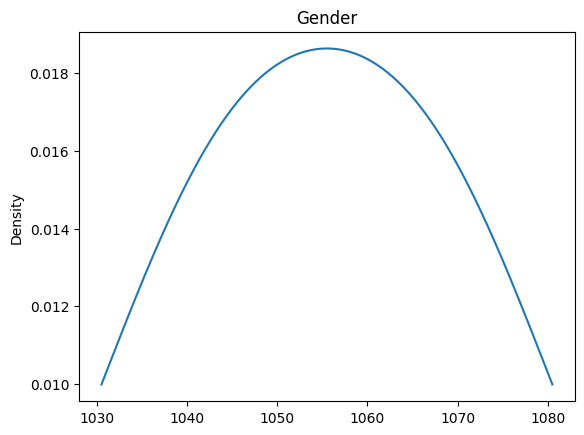

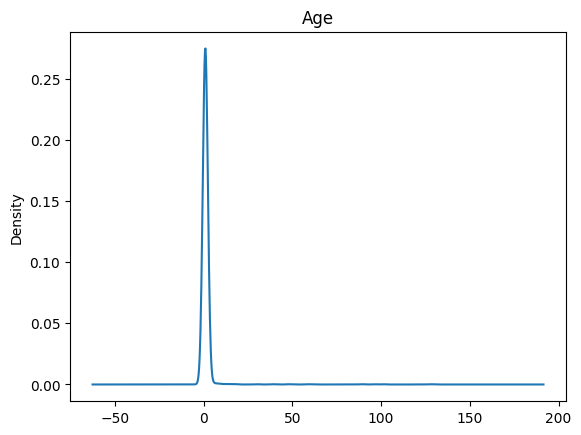

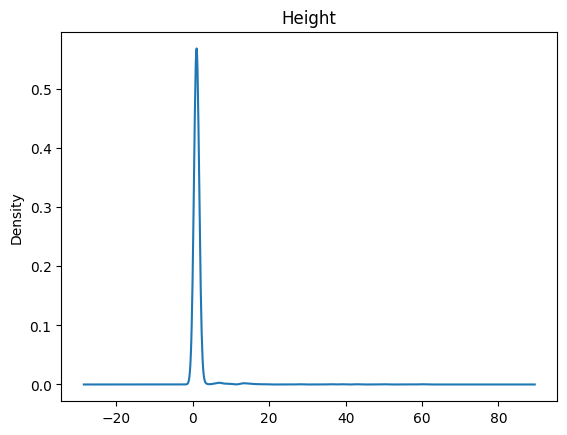

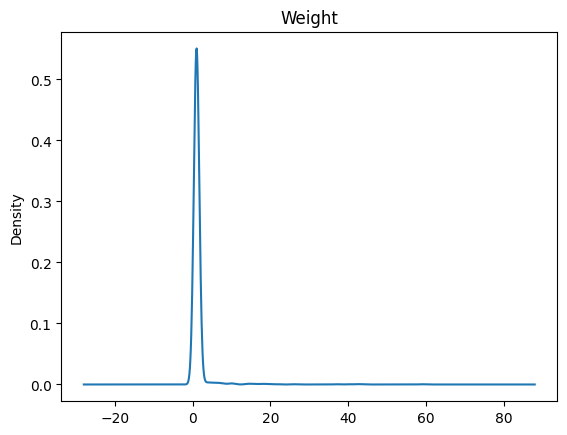

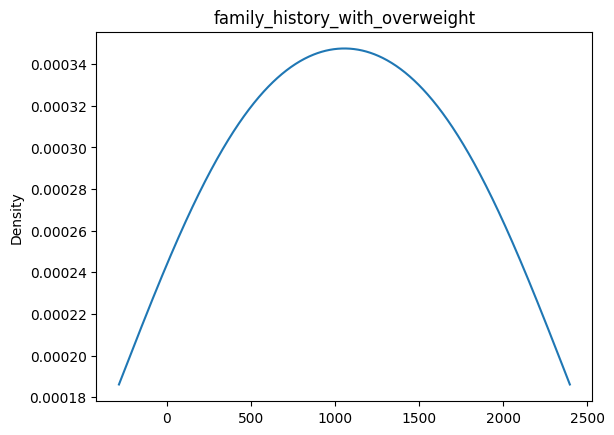

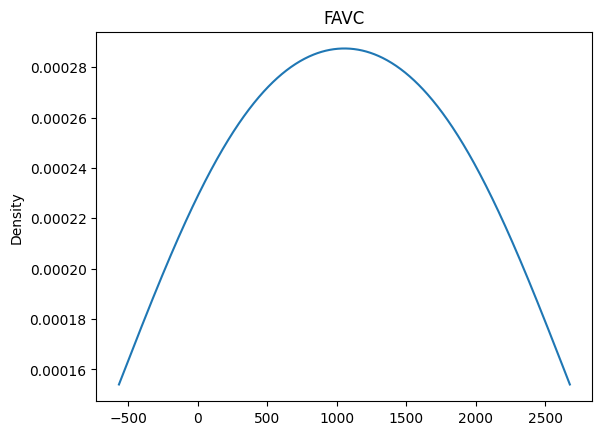

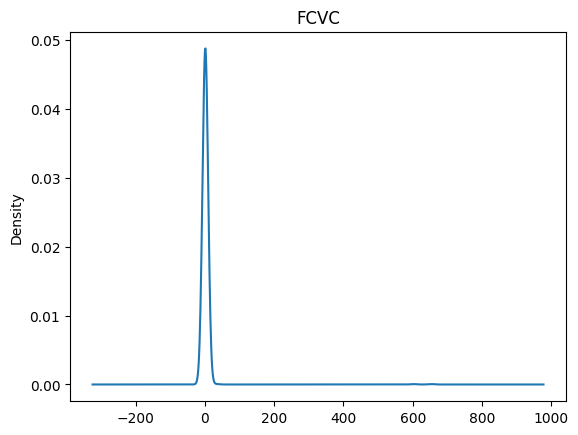

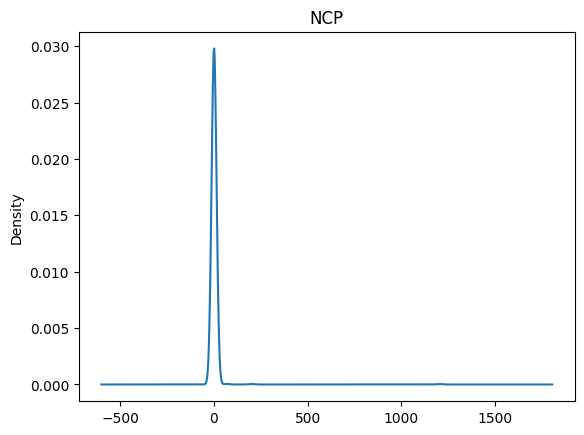

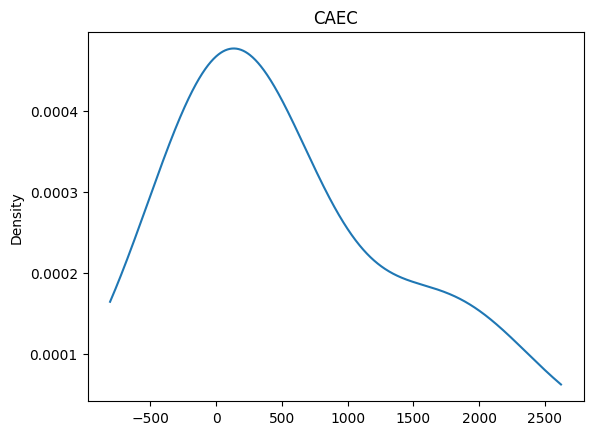

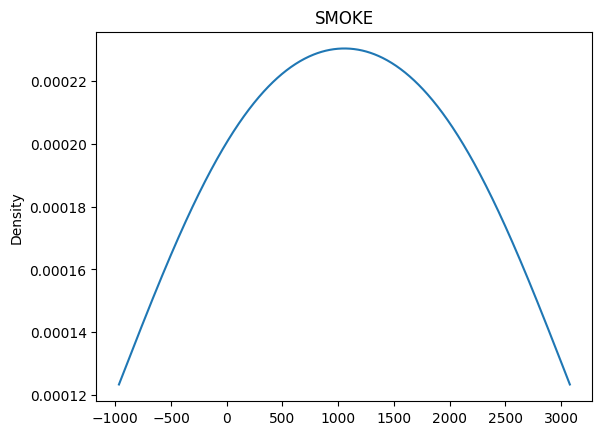

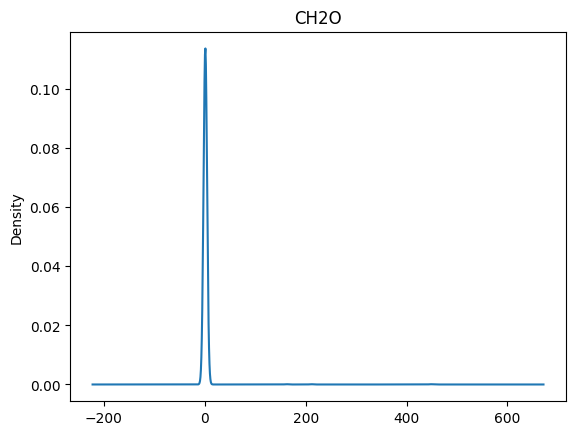

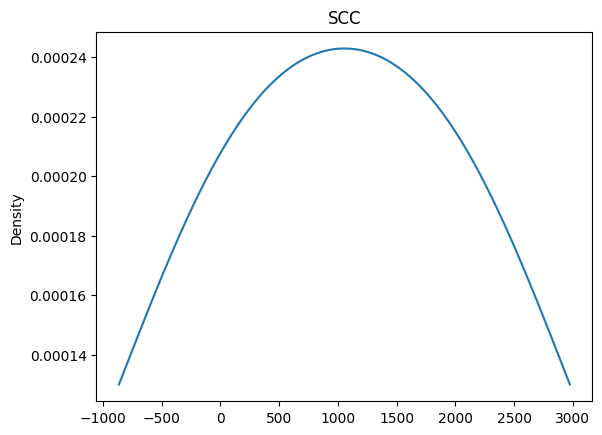

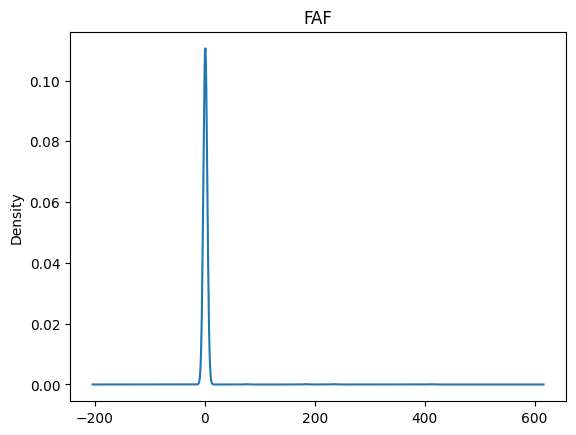

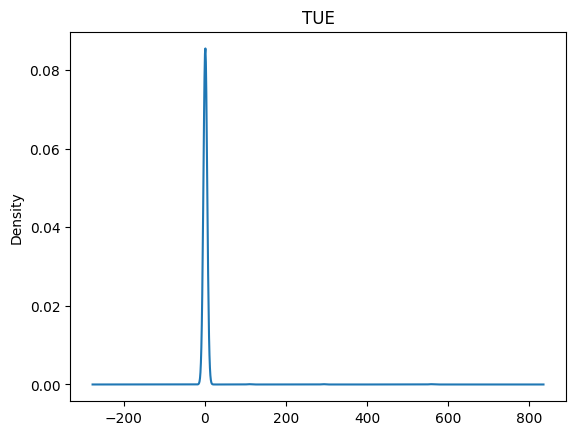

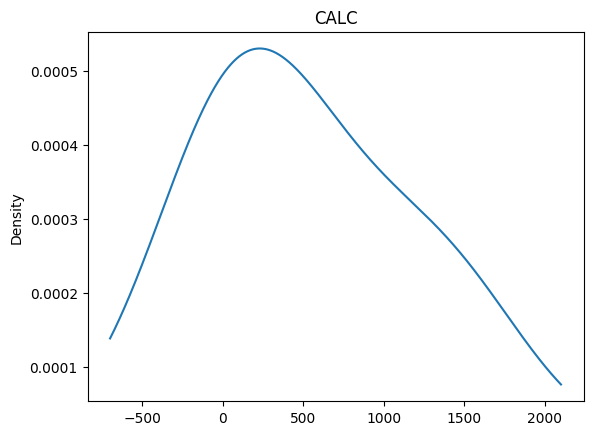

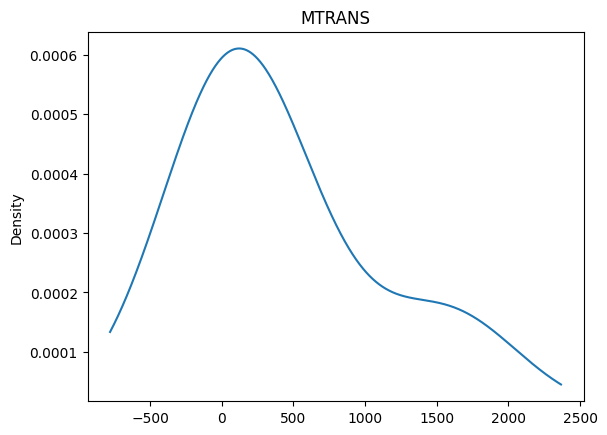

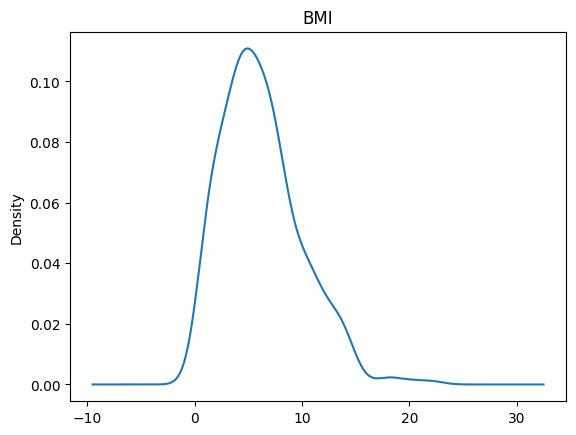

In [ ]:
### plot

import matplotlib.pyplot as plt

for col in df.columns:
    plt.figure()
    df[col].value_counts().plot(kind='kde')
    plt.title(col)

In [ ]:
### plot1 ((you can run it if you want))

#import plotly.express as px
#for col in df.columns:
  #col_counts = df[col].value_counts()
  #fig = px.bar(x = col_counts.index, y = col_counts.values)
  #fig.show()

In [ ]:
### plot2
df_num = df[['Age', 'Height', 'Weight', 'BMI']]
df_cat = df[['Gender', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS']]

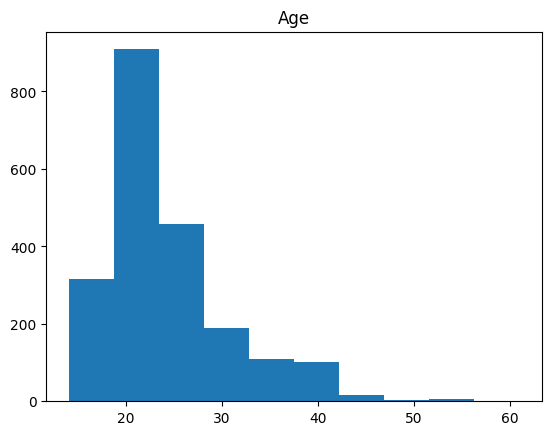

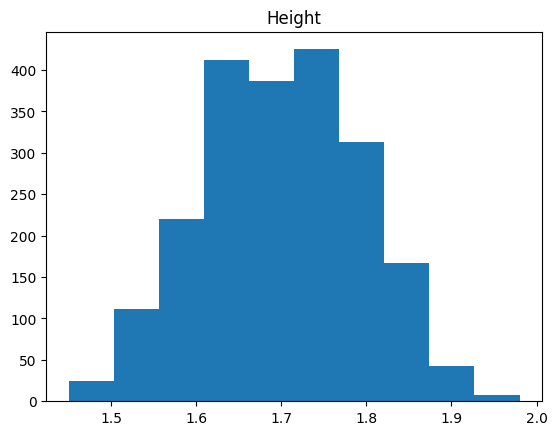

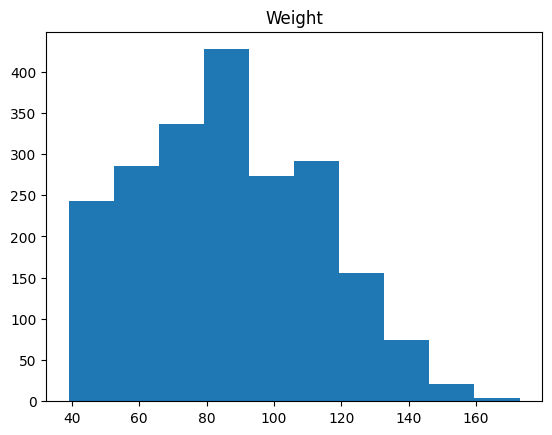

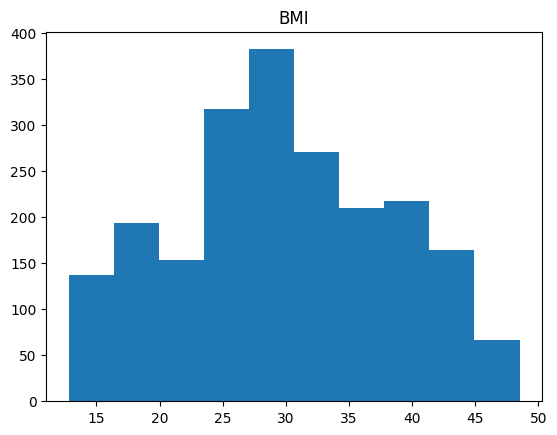

In [ ]:
# Distributions for all numeric variables
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

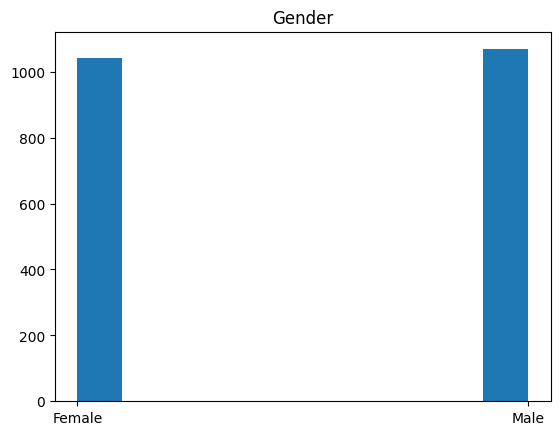

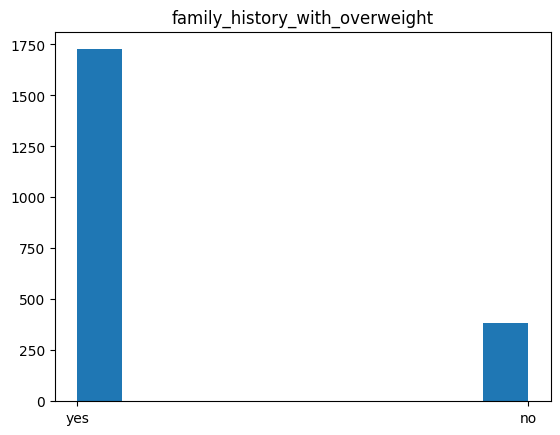

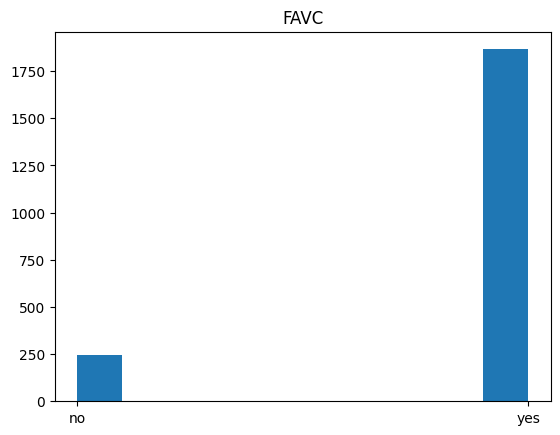

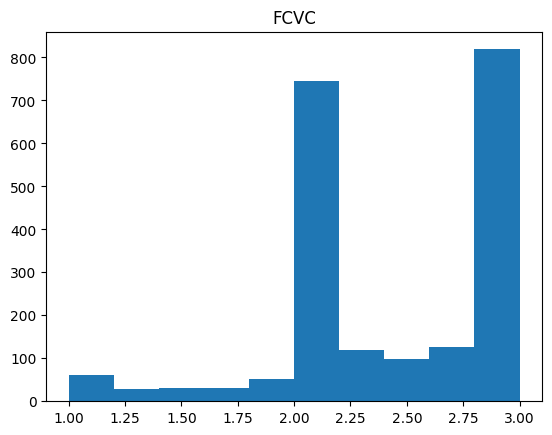

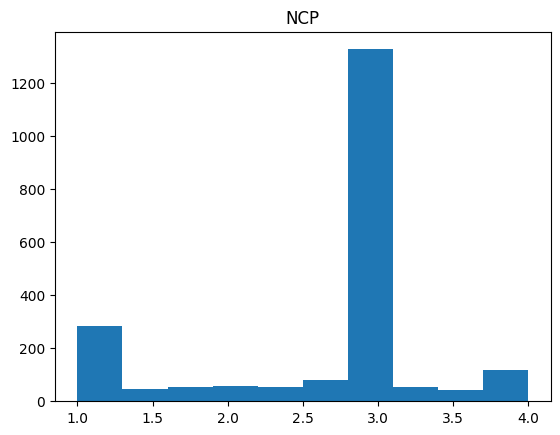

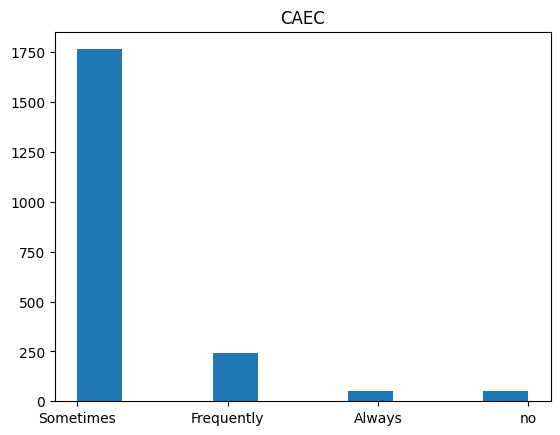

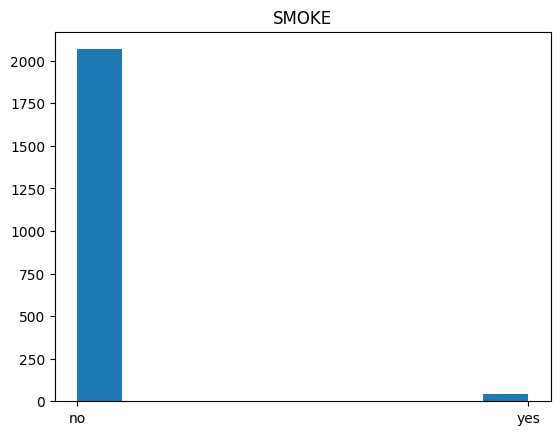

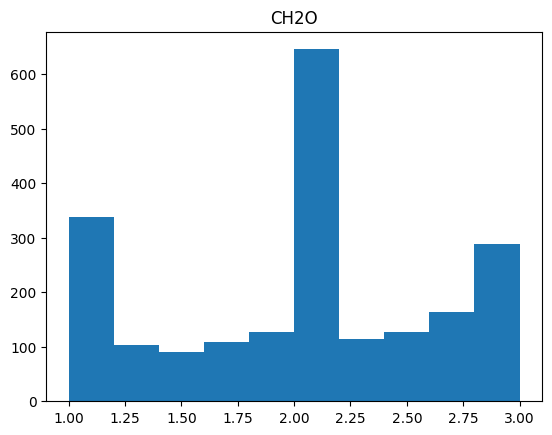

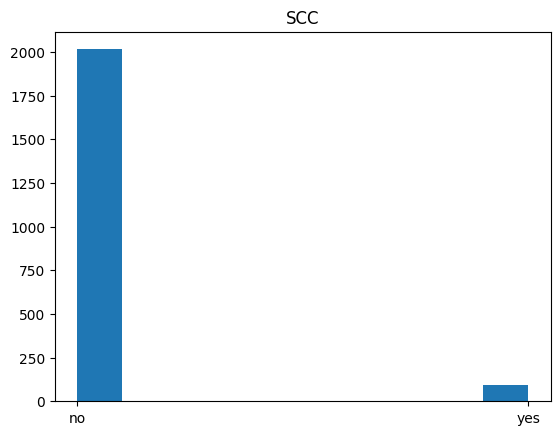

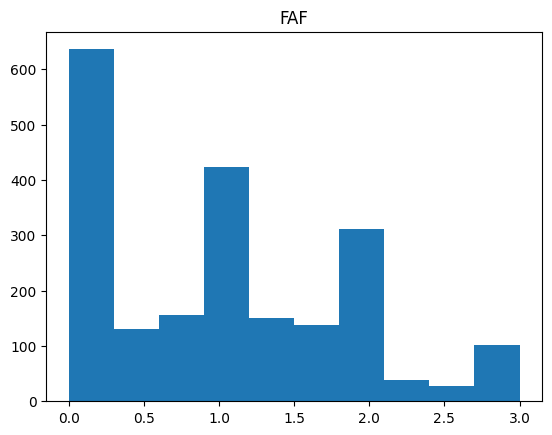

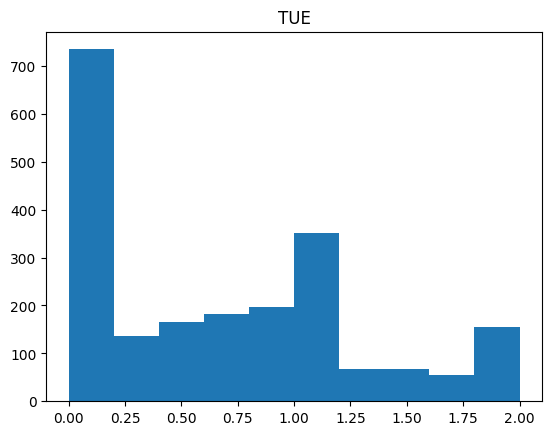

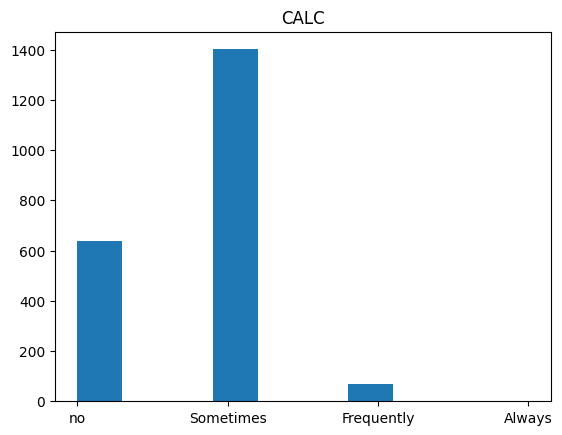

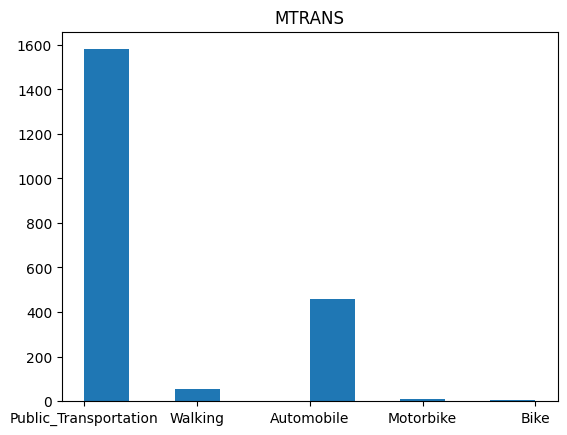

In [ ]:
# Categorical variables
import seaborn as sns
for i in df_cat.columns:
    plt.hist(df_cat[i])
    plt.title(i)
    plt.show()

In [ ]:
#Mean, std, and quartiles of numerical attributes

numerical_attributes = ["Age", 'Height',	'Weight','FCVC',	'NCP',	'CH2O',	'FAF',	'TUE','BMI']

for col in numerical_attributes:
    print(f'***{col}***')
    std = df[col].std()
    mean = df[col].mean()
    print(f'Mean: {mean:.2f}')
    print(f'Std: {std:.2f}')
    quartiles = df[col].quantile([0.25, 0.5, 0.75])
    print(f'Quartiles:\n{quartiles}')
    print("-"*15)

***Age***
Mean: 24.31
Std: 6.35
Quartiles:
0.25    19.947192
0.50    22.777890
0.75    26.000000
Name: Age, dtype: float64
---------------
***Height***
Mean: 1.70
Std: 0.09
Quartiles:
0.25    1.630000
0.50    1.700499
0.75    1.768464
Name: Height, dtype: float64
---------------
***Weight***
Mean: 86.59
Std: 26.19
Quartiles:
0.25     65.473343
0.50     83.000000
0.75    107.430682
Name: Weight, dtype: float64
---------------
***FCVC***
Mean: 2.42
Std: 0.53
Quartiles:
0.25    2.000000
0.50    2.385502
0.75    3.000000
Name: FCVC, dtype: float64
---------------
***NCP***
Mean: 2.69
Std: 0.78
Quartiles:
0.25    2.658738
0.50    3.000000
0.75    3.000000
Name: NCP, dtype: float64
---------------
***CH2O***
Mean: 2.01
Std: 0.61
Quartiles:
0.25    1.584812
0.50    2.000000
0.75    2.477420
Name: CH2O, dtype: float64
---------------
***FAF***
Mean: 1.01
Std: 0.85
Quartiles:
0.25    0.124505
0.50    1.000000
0.75    1.666678
Name: FAF, dtype: float64
---------------
***TUE***
Mean: 0.66
Std: 0

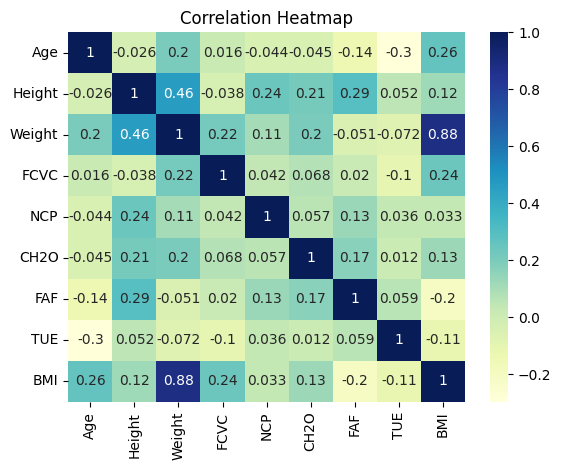

In [ ]:
# Visualize the dataset in convenient way and measure the correlation between different columns of the matrix using corr() command.

#print(df.corr())
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.title('Correlation Heatmap')
plt.show()

#sns.pairplot(df)

In [ ]:
#Check for existence of NaN or empty rows

print(df.isnull().sum().sum())
print(df.isnull().values.any())
print(df.empty)
nan_rows = df[df.isnull().any(axis=1)]
empty_rows = df[df.eq('').any(axis=1)]
print(nan_rows, empty_rows)

0
False
False
Empty DataFrame
Columns: [Gender, Age, Height, Weight, family_history_with_overweight, FAVC, FCVC, NCP, CAEC, SMOKE, CH2O, SCC, FAF, TUE, CALC, MTRANS, BMI]
Index: [] Empty DataFrame
Columns: [Gender, Age, Height, Weight, family_history_with_overweight, FAVC, FCVC, NCP, CAEC, SMOKE, CH2O, SCC, FAF, TUE, CALC, MTRANS, BMI]
Index: []


## Data Cleaning and Manipulation  
<font face="Arial" size=4><br>
Transform all categorical attributes to numerical attributes using ordinal encoders if the attribute is ordinal or one-hot encoders if the attribute is nominal.   

Add at least two attributes to the dataset using information of other columns. Explain the reasons you think the added columns are better indicators of the data.  
Scale the data and build a pipeline to be used later for test set.

According to BMI, I think another column should be added
```
if bmi < 18.5:
    print("Underweight") #0
elif 18.5 <= bmi < 25:
    print("Normal weight") #1
elif 25 <= bmi < 30:
    print("Overweight") #2
else:
    print("Obese"). #3
```

```
if bmi < 18.5:
    print("Underweight")
    obesity_level = "Not applicable" #0
elif 18.5 <= bmi < 25:
    print("Normal weight")
    obesity_level = "Not obese" #1
elif 25 <= bmi < 30:
    print("Overweight")
    obesity_level = "Obese (class I)" #2
elif 30 <= bmi < 35:
    print("Moderately obese")
    obesity_level = "Obese (class II)" #3
elif 35 <= bmi < 40:
    print("Severely obese")
    obesity_level = "Obese (class III)" #4
else:
    print("Very severely obese")
    obesity_level = "Obese (class IV)" #5
```

according to the second code

In [ ]:
#Add at least two attributes to the dataset using information of other columns. Explain the reasons you think the added columns are better indicators of the data.
df.insert(0, column = "NObeyesdad", value = 0)

bmi = [j for j in df['BMI']]

In [ ]:
NObeyesdad = []
for j in bmi:

  if j < 18.5:
    NObeyesdad.append(0) # "Not applicable"
  elif 18.5 <= j < 25:
    NObeyesdad.append(1) # "Not obese"
  elif 25 <= j < 30:
    NObeyesdad.append(2) # "Obese (class I)"
  elif 30 <= j < 35:
    NObeyesdad.append(3) # "Obese (class II)"
  elif 35 <= j < 40:
    NObeyesdad.append(4) # "Obese (class III)"
  elif 40 <= j < 45:
    NObeyesdad.append(5) # "Obese (class IV)"
  else:
    NObeyesdad.append(6) # "Obese (class V)"


df['NObeyesdad'] = NObeyesdad

In [ ]:
df.head()

,NObeyesdad,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI
0,1,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,18.9
1,1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,22.7
2,1,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,21.6
3,2,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,28.0
4,2,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,26.6


I consider the next column "living Healthy" with:


good = 1, bad = 0



```
 Do you eat high caloric food frequently? #FAVC: yes = 0 , no = 1

Do you smoke? #SMOKE: yes = 0, no = 1

Do you monitor the calories you eat daily? #SCC: yes = 1, no = 0

How often do you drink alcohol?	 #CALC: no = 1, others = 0

Which transportation do you usually use?  #MTRANS: Walking = 1, others = 0
```



The new column is the sum of these values, which is in the range of zero to five

In [ ]:
df.insert(0, column = "living Healthy", value = 0)

In [ ]:
FAVC_col = []
for i in df['FAVC']:
  if i == 'yes':
    FAVC_col.append(0)
  else:
    FAVC_col.append(1)

In [ ]:
smoke_col = []
for i in df['SMOKE']:
  if i == 'yes':
    smoke_col.append(0)
  else:
    smoke_col.append(1)

In [ ]:
calc_col = []
for i in df['CALC']:
  if i == 'no':
    calc_col.append(1)
  else:
    calc_col.append(0)

In [ ]:
mtrans_col = []
for i in df['MTRANS']:
  if i == 'Walking':
    mtrans_col.append(1)
  else:
    mtrans_col.append(0)

In [ ]:
scc_col = []
for i in df['SCC']:
  if i == 'yes':
    scc_col.append(1)
  else:
    scc_col.append(0)

In [ ]:
Healthy_living_col = []
for a, b, c, d, e in zip(FAVC_col, smoke_col, calc_col, mtrans_col, scc_col):
  Healthy_living_col.append(a+b+c+d+e)

df['living Healthy'] = Healthy_living_col

In [ ]:
df.head()

,living Healthy,NObeyesdad,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI
0,3,1,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,18.9
1,2,1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,22.7
2,2,1,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,21.6
3,3,2,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,28.0
4,2,2,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,26.6


In [ ]:
# Transform all categorical attributes to numerical attributes using ordinal encoders if the attribute is ordinal or one-hot encoders if the attribute is nominal

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

cat_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
ordinal_encoder = OrdinalEncoder()
df[cat_cols] = ordinal_encoder.fit_transform(df[cat_cols])


df.head()

,living Healthy,NObeyesdad,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI
0,3,1,0.0,21.0,1.62,64.0,1.0,0.0,2.0,3.0,2.0,0.0,2.0,0.0,0.0,1.0,3.0,3.0,18.9
1,2,1,0.0,21.0,1.52,56.0,1.0,0.0,3.0,3.0,2.0,1.0,3.0,1.0,3.0,0.0,2.0,3.0,22.7
2,2,1,1.0,23.0,1.80,77.0,1.0,0.0,2.0,3.0,2.0,0.0,2.0,0.0,2.0,1.0,1.0,3.0,21.6
3,3,2,1.0,27.0,1.80,87.0,0.0,0.0,3.0,3.0,2.0,0.0,2.0,0.0,2.0,0.0,1.0,4.0,28.0
4,2,2,1.0,22.0,1.78,89.8,0.0,0.0,2.0,1.0,2.0,0.0,2.0,0.0,0.0,0.0,2.0,3.0,26.6


In [ ]:
cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC', 'MTRANS']

encoder = OneHotEncoder(handle_unknown='ignore')
encoder.fit(df[cat_cols])

encoded_cols = encoder.transform(df[cat_cols]).toarray()
encoded_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(cat_cols))

df = pd.concat([df, encoded_df], axis=1)
df.drop(cat_cols, axis=1, inplace=True)

# Save the encoded dataframe as a new CSV file
df.to_csv("df_new.csv", index=False)

In [ ]:
df_new = pd.read_csv("/content/df_new.csv")
df_new.head()

,living Healthy,NObeyesdad,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,...,SCC_1.0,CALC_0.0,CALC_1.0,CALC_2.0,CALC_3.0,MTRANS_0.0,MTRANS_1.0,MTRANS_2.0,MTRANS_3.0,MTRANS_4.0
0,3,1,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,2,1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2,1,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3,2,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2,2,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# check the data type
df_new.dtypes

living Healthy                          int64
NObeyesdad                              int64
Age                                   float64
Height                                float64
Weight                                float64
FCVC                                  float64
NCP                                   float64
CH2O                                  float64
FAF                                   float64
TUE                                   float64
BMI                                   float64
Gender_0.0                            float64
Gender_1.0                            float64
family_history_with_overweight_0.0    float64
family_history_with_overweight_1.0    float64
FAVC_0.0                              float64
FAVC_1.0                              float64
CAEC_0.0                              float64
CAEC_1.0                              float64
CAEC_2.0                              float64
CAEC_3.0                              float64
SMOKE_0.0                         

### Principal Component Analysis  
<font face="Arial" size=4><br>
Use `sklearn.decomposition.PCA` to reduce the dimension of dataset to a convenient number. Plot the scree plot for the final solution.

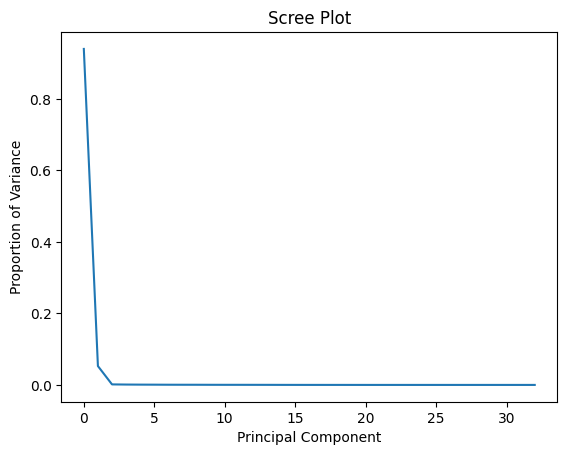

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
X = df_new.drop('BMI', axis=1)
X = pca.fit_transform(X)

plt.plot(pca.explained_variance_ratio_)
plt.ylabel('Proportion of Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

#reference : https://www.sciencedirect.com/topics/mathematics/scree-plot

In [ ]:
#Scale the data and build a pipeline to be used later for test set.

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import Pipeline

y = df_new['BMI']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify = df_new['NObeyesdad'])

pipeline_lr = Pipeline([
    ('scaling', StandardScaler()),
    ('lr', LinearRegression())
])
pipeline_ridge = Pipeline([
    ('scaling', StandardScaler()),
    ('ridge', Ridge(alpha=10))
])
pipeline_lasso = Pipeline([
    ('scaling', StandardScaler()),
    ('lasso', Lasso(alpha=.1))
])

## Model Training  
<font face="Arial" size=4><br>
Train the <code>linear regression</code> model and its regularized forms (<code>ridge</code> and <code>lasso</code>) on your training data. Cross-validate the models using <code>10 fold CV</code> and report the accuracy scores. You are allowed to use <code>sklearn.linear_model</code> for your implementation.

### Linear Regression

In [ ]:
pipeline_lr.fit(X_train, y_train)
#print('Test Score of Linear Regression Model: %.3f' % pipeline_lr.score(X_test, y_test))
Linear_Regression_score = cross_val_score(pipeline_lr, X_train, y_train, cv=10)
print(Linear_Regression_score)

[ 8.69369999e-01  9.77438288e-01  9.68960577e-01  9.78507645e-01
 -1.00982513e+28  9.77609182e-01  9.77919641e-01  9.73429326e-01
  9.73488958e-01  9.72676170e-01]


In [ ]:
y_pred_lr = pipeline_lr.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y_test, y_pred_lr)
print(f"R2 score: {r2}.")

mean_squared_error = mean_squared_error(y_test, y_pred_lr)
print(f"mean squared error: {mean_squared_error}.")

R2 score: 0.9739455348147741.
mean squared error: 1.8384350663889033.


### Ridge Regression

In [ ]:
pipeline_ridge.fit(X_train, y_train)
Ridge_Regression_score = cross_val_score(pipeline_ridge, X_train, y_train, cv=10)
print(Linear_Regression_score)

[ 8.69369999e-01  9.77438288e-01  9.68960577e-01  9.78507645e-01
 -1.00982513e+28  9.77609182e-01  9.77919641e-01  9.73429326e-01
  9.73488958e-01  9.72676170e-01]


In [ ]:
y_pred_ridge = pipeline_ridge.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y_test, y_pred_ridge)
print(f"R2 score: {r2}.")

mean_squared_error = mean_squared_error(y_test, y_pred_ridge)
print(f"mean squared error: {mean_squared_error}.")

R2 score: 0.9741510884052802.
mean squared error: 1.8239309525595793.


### Lasso Regression

In [ ]:
pipeline_lasso.fit(X_train, y_train)
Lasso_Regression_score = cross_val_score(pipeline_lasso, X_train, y_train, cv=10)
print(Linear_Regression_score)

[ 8.69369999e-01  9.77438288e-01  9.68960577e-01  9.78507645e-01
 -1.00982513e+28  9.77609182e-01  9.77919641e-01  9.73429326e-01
  9.73488958e-01  9.72676170e-01]


In [ ]:
y_pred_lasso = pipeline_lasso.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y_test, y_pred_lasso)
print(f"R2 score: {r2}.")

mean_squared_error = mean_squared_error(y_test, y_pred_lasso)
print(f"mean squared error: {mean_squared_error}.")

R2 score: 0.9723509062658953.
mean squared error: 1.9509540154934903.


## Final Report  
<font face="Arial" size=4><br>
After training the data, use your pipeline previously created to transform the test data to decent form and then run your final model and report the accuracy score.

In [ ]:
print('Test Score of Linear Regression Model: %.6f' % pipeline_lr.score(X_test, y_test))
print('Test Score of Lasso Regression Model: %.6f' % pipeline_lasso.score(X_test, y_test))
print('Test Score of Ridge Regression Model: %.6f' % pipeline_ridge.score(X_test, y_test))

Test Score of Linear Regression Model: 0.973946
Test Score of Lasso Regression Model: 0.972351
Test Score of Ridge Regression Model: 0.974151


**(Ridge > Lasso > Linear)regression** in first run

**(linear > Ridge > Lasso)regression** in second run

**(Ridge  > linear > Lasso)regression** in third run